In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importar datos

In [250]:
df = pd.read_csv("datos_de_clientes.csv", delimiter="\t")

def set_pandas_display_options():
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 2240
    display.max_colwidth = 199
    display.width = 1000

set_pandas_display_options()

print(df)

         ID  Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
0      5524        1957  Graduation         Single   58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1
1      2174        1954  Graduation         Single   46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6               

Encontrar el año mayor

In [251]:
max_age = max(df['Year_Birth'])
max_age

1996

Dado que la persona más joven tiene más de 18 años, podemos tener en cuenta que todas las campañas se enfocan a adultos.

# Limpieza de datos

## Transformacion 1 - Eliminar constantes

z_costcontact y z_costrevenue es constante en todos los datos. Por tanto, no dan información valiosa y pueden eliminarse.

In [252]:
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])
print(df)

         ID  Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response
0      5524        1957  Graduation         Single   58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1
1      2174        1954  Graduation         Single   46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6                  2                1                    1          

## Transformacion 2 - Año de nacimiento

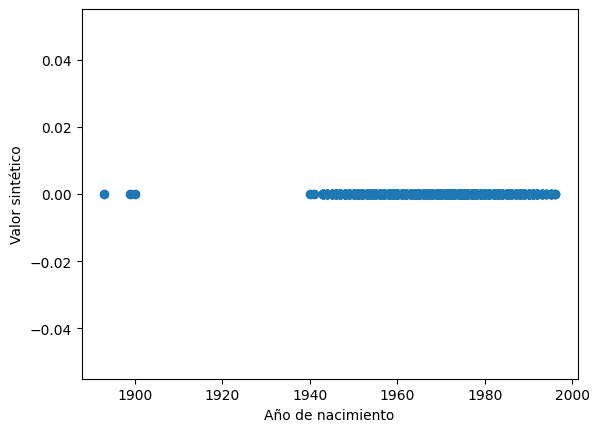

In [253]:
plt.scatter(df['Year_Birth'], np.zeros_like(df['Year_Birth']))
plt.xlabel('Año de nacimiento')
plt.ylabel('Valor sintético')
plt.show()

Como podemos ver, los años bajo 1935(aprox) son outliers. Tiene sentido debido a que son los propios usuarios los que rellenan este campo. Debido a la importancia de la columna, consideramos más apropiado dropear estos datos más que transformarlos o intentar hacerlos más uniformes.

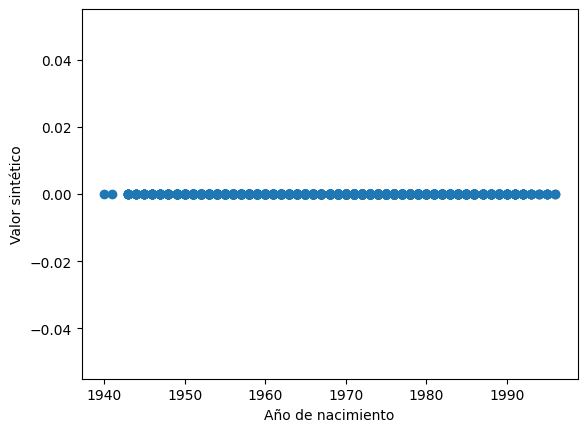

In [254]:
df = df[df.Year_Birth > 1920]

plt.scatter(df['Year_Birth'], np.zeros_like(df['Year_Birth']))
plt.xlabel('Año de nacimiento')
plt.ylabel('Valor sintético')
plt.show()

Ahora tenemos una representación más uniforme sin outliers

## Transformacion 3 - Ingresos

Gracias al escaneo visual de la base de datos, encontramos que hay clientes que tienen el campo de Income vacío. Los llenaremos con la media.

In [255]:
mean_income = np.mean(df['Income'])
mean_income

df['Income'].fillna(mean_income, inplace = True)

Con los datos sin ningun nulo, ahora grafiquemoslos

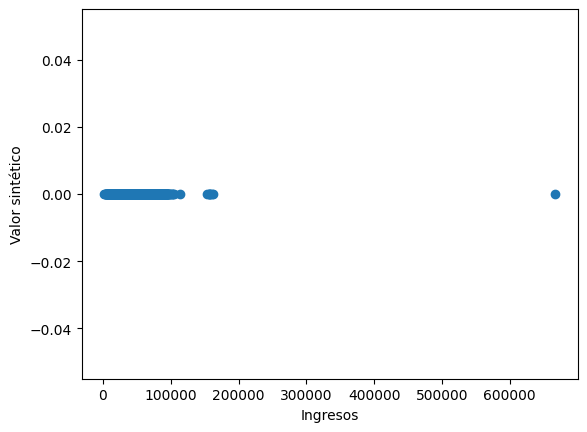

In [256]:
plt.scatter(df['Income'], np.zeros_like(df['Income']))
plt.xlabel('Ingresos')
plt.ylabel('Valor sintético')
plt.show()

Bajo el mismo tren de pensamiento del año de nacimiento, eliminaremos el outlier extremo de la derecha.

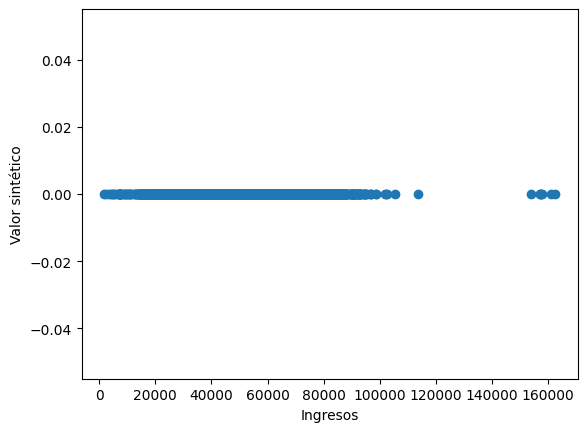

In [257]:
df = df[df.Income < 300000]

plt.scatter(df['Income'], np.zeros_like(df['Income']))
plt.xlabel('Ingresos')
plt.ylabel('Valor sintético')
plt.show()

Encontremos los outliers utilizando cuartiles

In [258]:
cuartiles = np.quantile(df['Income'], [0,0.25,0.5,0.75,1])
print(f'Cuartiles: {cuartiles}')

iqr = cuartiles[3] - cuartiles[1]
lower_bound = cuartiles[1] - 1.5*iqr
upper_bound = cuartiles[3] + 1.5*iqr

outlier_range = (lower_bound, upper_bound)
print(f'Rango de datos no atipicos: {outlier_range}')

Cuartiles: [  1730.    35502.5   51684.    68275.75 162397.  ]
Rango de datos no atipicos: (-13657.375, 117435.625)


Eliminaremos todos los datos atípicos dado que no representan al resto de nuestros consumidores

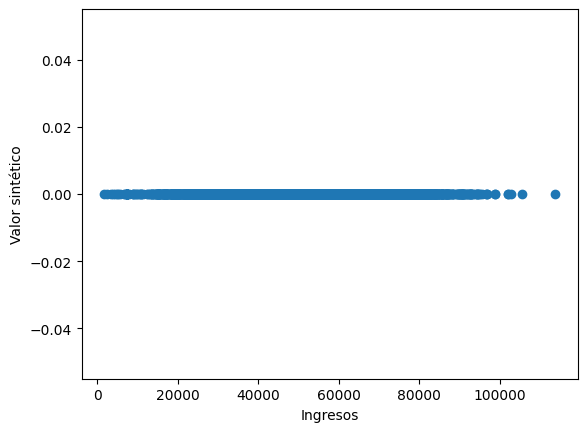

In [259]:
df = df[df.Income < outlier_range[1]]

plt.scatter(df['Income'], np.zeros_like(df['Income']))
plt.xlabel('Ingresos')
plt.ylabel('Valor sintético')
plt.show()

Los datos ahora estan mucho mejor distribuidos

## Transformacion 4 - Estatus Marital

Veamos que estados maritales hay

In [260]:
marital_values = set(df['Marital_Status'])
marital_values

{'Absurd',
 'Alone',
 'Divorced',
 'Married',
 'Single',
 'Together',
 'Widow',
 'YOLO'}

In [261]:
absurd_total = len(df[df.Marital_Status == 'Absurd'])
print(f"Num de personas con Marital Status = Absurd = {absurd_total}")

yolo_total = len(df[df.Marital_Status == 'YOLO'])
print(f"Num de personas con Marital Status = YOLO = {yolo_total}")

Num de personas con Marital Status = Absurd = 2
Num de personas con Marital Status = YOLO = 2


Absurd, Alone y YOLO no tienen sentido. Transformemos estos valores:

- Alone ---> Single
- Absurd ---> Drop
- YOLO ---> Drop

Dropeamos los ultimos clientes porque no representan ningun porcentaje significativo

In [262]:
df = df.replace('Alone', 'Single')
df = df[df.Marital_Status != 'Absurd']
df = df[df.Marital_Status != 'YOLO']

marital_values = set(df['Marital_Status'])
marital_values

{'Divorced', 'Married', 'Single', 'Together', 'Widow'}

Ahora tenemos solo los valores significativos.

In [263]:
marital_encoded = pd.get_dummies(df["Marital_Status"], prefix="Mar_status", dtype=int)
df = pd.concat([df, marital_encoded], axis=1)
df = df.drop("Marital_Status", axis=1)

print(df)

         ID  Year_Birth   Education         Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Mar_status_Divorced  Mar_status_Married  Mar_status_Single  Mar_status_Together  Mar_status_Widow
0      5524        1957  Graduation   58138.000000        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1                    0                   0                  1                    0                 0
1      2174        1954  Graduation   46344.000000        1         1  08-03

Esta columna cualitativa ha sido transformada con Bernoulli

## Transformacion 5 - Education

Veamos que niveles de educacion hay

In [264]:
education_values = set(df['Education'])
education_values

{'2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'}

No hay que tratar estas columnas aparte de su codificacion Bernoulli

In [265]:
education_encoded = pd.get_dummies(df["Education"], prefix="Edu", dtype=int)
df = pd.concat([df, education_encoded], axis=1)
df = df.drop("Education", axis=1)

print(df)

         ID  Year_Birth         Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Mar_status_Divorced  Mar_status_Married  Mar_status_Single  Mar_status_Together  Mar_status_Widow  Edu_2n Cycle  Edu_Basic  Edu_Graduation  Edu_Master  Edu_PhD
0      5524        1957   58138.000000        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1                    0                   0                  1                    0                 0             0          0              

## Transformacion 6 - Teenhome, kidhome

Debido a que no hay una diferenciación importante entre tener adolescentes o niños en casa (al menos basados en los productos que se presentan), juntaremos ambas columnas en una única columna derivada llamada 'Children'

In [266]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df = df.drop(columns=['Teenhome','Kidhome'], axis=1)

print(df)

         ID  Year_Birth         Income Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Mar_status_Divorced  Mar_status_Married  Mar_status_Single  Mar_status_Together  Mar_status_Widow  Edu_2n Cycle  Edu_Basic  Edu_Graduation  Edu_Master  Edu_PhD  Children
0      5524        1957   58138.000000  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1                    0                   0                  1                    0                 0             0          0               1           0        0     

## Transformacion 7 - Num_campaigns_accepted

In [ ]:
#TODO: Transformacion que junto las campañas

# Datos después de ser tratados

In [269]:
print(f"Cantidad de datos: {len(df)} \n")
print(f"Columnas usadas: {df.columns} \n")
print(f"Información relevante: \n{df.describe()} \n\n")

print(f'Primeros datos de la tabla: \n{df.head(5)}\n')
print(f'Ultimos datos de la tabla: \n{df.tail(5)}')

Cantidad de datos: 2225 

Columnas usadas: Index(['ID', 'Year_Birth', 'Income', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Mar_status_Divorced', 'Mar_status_Married', 'Mar_status_Single', 'Mar_status_Together', 'Mar_status_Widow', 'Edu_2n Cycle', 'Edu_Basic', 'Edu_Graduation', 'Edu_Master', 'Edu_PhD', 'Children'], dtype='object') 

Información relevante: 
                 ID   Year_Birth         Income      Recency     MntWines    MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  Mar_s